# Breast Cancer Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

- Load the breast cancer dataset using datasets.load_breast_cancer()

In [ ]:
data = datasets.load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=list(data['feature_names']) + ['target'])

- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples.

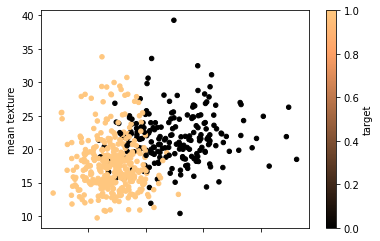

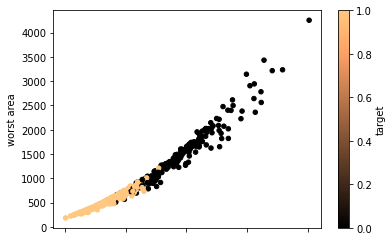

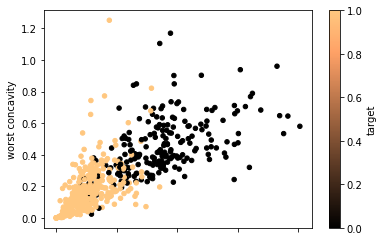

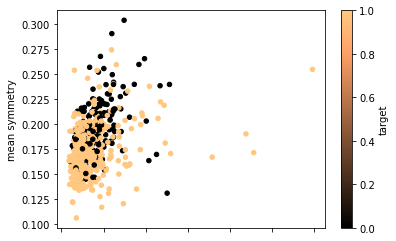

In [ ]:
breast_cancer_df.plot.scatter(x='mean radius', y='mean texture', c='target', colormap='copper')
breast_cancer_df.plot.scatter(x='worst perimeter', y='worst area', c='target', colormap='copper')
breast_cancer_df.plot.scatter(x='mean concave points', y='worst concavity', c='target', colormap='copper')
breast_cancer_df.plot.scatter(x='fractal dimension error', y='mean symmetry', c='target', colormap='copper')

- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).

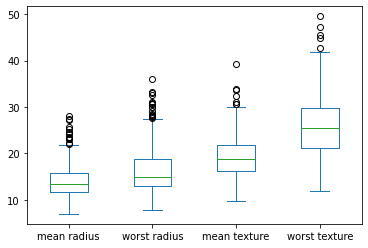

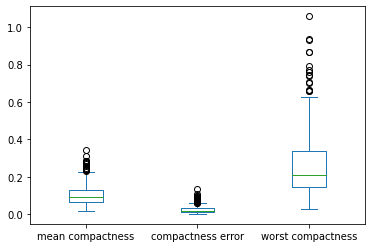

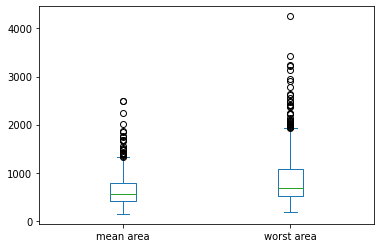

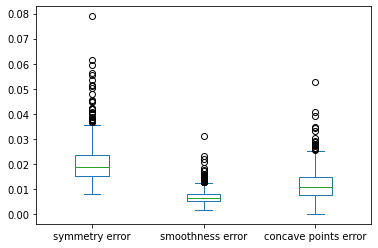

In [ ]:
breast_cancer_df[['mean radius', 'worst radius', 'mean texture', 'worst texture']].plot.box()
breast_cancer_df[['mean compactness', 'compactness error', 'worst compactness']].plot.box()
breast_cancer_df[['mean area', 'worst area']].plot.box()
breast_cancer_df[['symmetry error', 'smoothness error', 'concave points error']].plot.box()

- Create a training and test set (with shuffling).

In [ ]:
train_df, test_df = train_test_split(breast_cancer_df) # shuffle=True


- Train a **decision tree classifier** using the training set.

In [ ]:
tree = DecisionTreeClassifier() # I did not give any parameters here, because default parameters works well
tree.fit(train_df.drop('target', axis=1), train_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

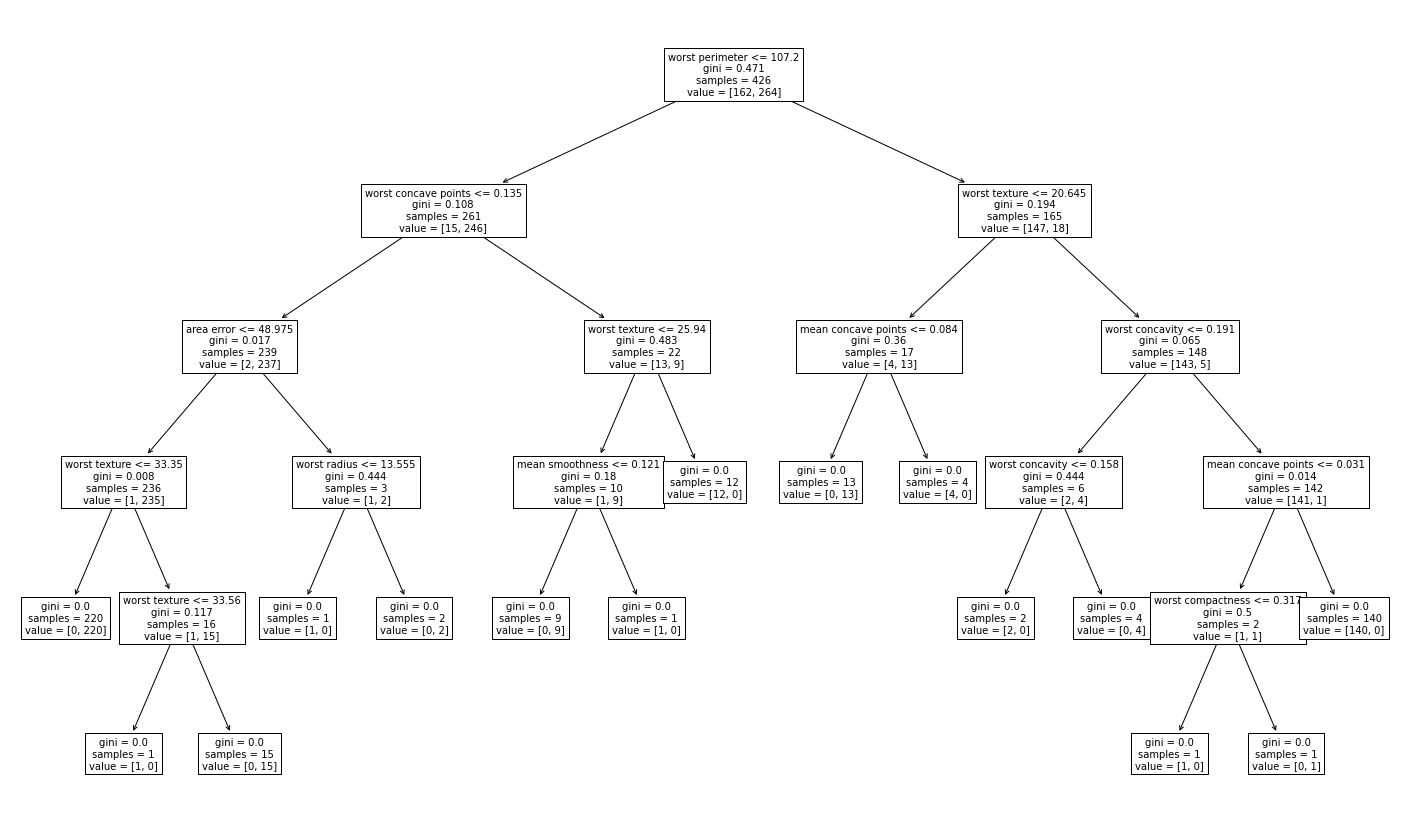

In [ ]:
from sklearn import tree as tr
pyplot.figure(figsize=(25,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

- What are the top 5 most important (discriminative) features?

In [ ]:
print('Most important five features in order of importances are;\n')
# I used Series for sorting and getting features names and feature importances together
importances = pd.Series(tree.feature_importances_, data['feature_names'])
print(importances.sort_values(ascending=False).head())

Most important five features in order of importances are;

worst perimeter         0.699442
worst texture           0.135071
worst concave points    0.068096
worst concavity         0.038230
mean concave points     0.035378
dtype: float64


- Train a **logistic regression** model using the training set.

In [ ]:
lr = LogisticRegression(max_iter=2500) # Since max_iter is exceeding default value i made it 2500.
lr.fit(train_df.drop('target', axis=1), train_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(max_iter=2500)


- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.

In [ ]:
print('Decision Tree Classifier score: ' + str(tree.score(test_df.drop('target', axis=1), test_df['target'])))
print('Logistic Regression score: ' + str(lr.score(test_df.drop('target', axis=1), test_df['target'])) + '\n')

Decision Tree Classifier score: 0.9300699300699301
Logistic Regression score: 0.951048951048951



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
